CLUSTERING 


In [ ]:
! pip install us

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
## importing Libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch
from scipy import stats
import us
import plotly.express as px
from plotly .subplots import make_subplots
import warnings 

warnings.filterwarnings("ignore")

In [ ]:
# defining required function 
# normalization function 
def norm_func(i):
 x=(i-i.min())/(i.max()-i.min())
 return(x)

In [ ]:
scalar = StandardScaler

DATA - CRIME 

In [ ]:
#load dataset
data1=pd.read_csv("/content/crime_data.csv", index_col=0)

In [ ]:
data1.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


### About the Dataset

* Murder -- Muder rates in different places of United States


* Assualt- Assualt rate in different places of United States


* UrbanPop - urban population in different places of United States


* Rape - Rape rate in different places of United States

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [ ]:
data1.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


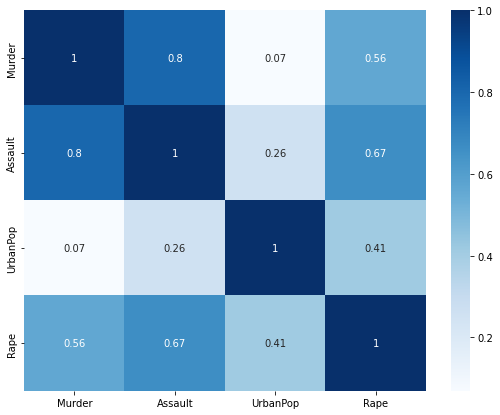

In [ ]:
plt.figure(figsize=(9,7))
sns.heatmap(data1.corr(),cbar=True,annot=True,cmap='Blues')
plt.show()

### Hierachical Clustering

In [ ]:
# craet a copy of data 
data1_hc = data1.copy()

In [ ]:
#Normalized data fuction
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [ ]:
# normalizing data frame
df_norm=norm_func(data1_hc.iloc[:,1:])
df_norm

,Assault,UrbanPop,Rape
Alabama,0.654110,0.440678,0.359173
Alaska,0.746575,0.271186,0.961240
Arizona,0.852740,0.813559,0.612403
Arkansas,0.496575,0.305085,0.315245
California,0.791096,1.000000,0.860465
Colorado,0.544521,0.779661,0.811370
Connecticut,0.222603,0.762712,0.098191
Delaware,0.660959,0.677966,0.219638
Florida,0.993151,0.813559,0.635659
Georgia,0.568493,0.474576,0.478036


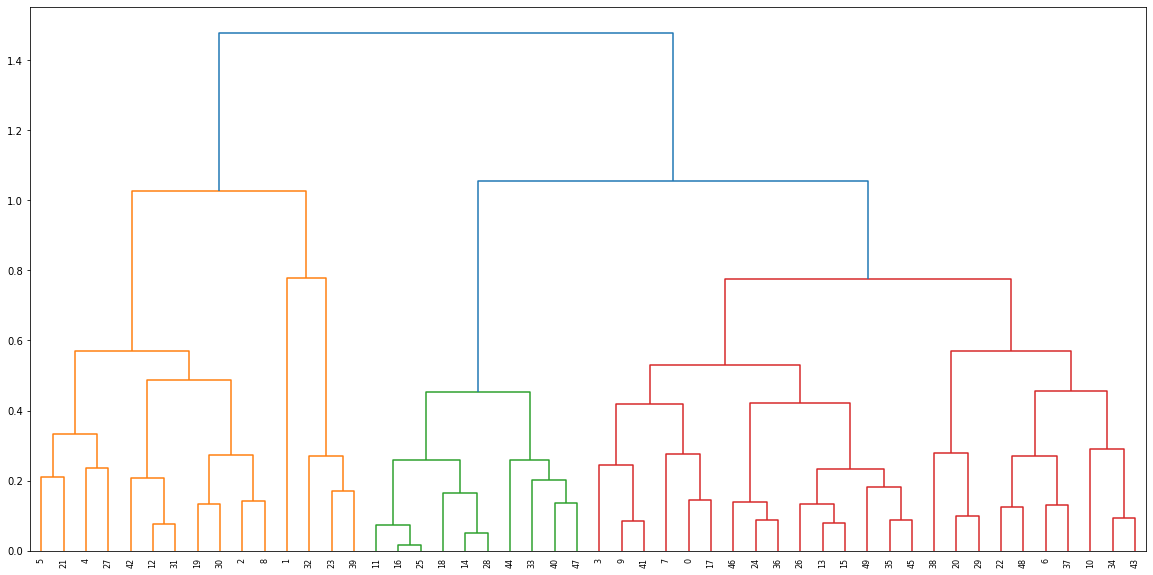

In [ ]:
# creat dendrogram
plt.figure(figsize=(20,10))
dendrogram1=sch.dendrogram(sch.linkage(df_norm,method="complete"))

seeing at the dendogram we can select numbeer of cluster as 4

In [ ]:
# create clusters
hc1=AgglomerativeClustering(n_clusters=4,affinity = "euclidean",linkage="complete")
hc1.fit(df_norm)

AgglomerativeClustering(linkage='complete', n_clusters=4)

In [ ]:
# saving the clusters
y_hc1 = hc1.fit_predict(df_norm)
y_hc1

array([1, 0, 3, 1, 3, 3, 1, 1, 3, 1, 1, 2, 3, 1, 2, 1, 2, 1, 2, 3, 1, 3,
       1, 0, 1, 2, 1, 3, 2, 1, 3, 3, 0, 2, 1, 1, 1, 1, 1, 0, 2, 1, 3, 1,
       2, 1, 1, 2, 1, 1])

In [ ]:
# adding the clusters to the dataframe
data1_hc['clusterID_hc']=y_hc1
data1_hc

,Murder,Assault,UrbanPop,Rape,clusterID_hc
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,0
Arizona,8.1,294,80,31.0,3
Arkansas,8.8,190,50,19.5,1
California,9.0,276,91,40.6,3
Colorado,7.9,204,78,38.7,3
Connecticut,3.3,110,77,11.1,1
Delaware,5.9,238,72,15.8,1
Florida,15.4,335,80,31.9,3
Georgia,17.4,211,60,25.8,1


In [ ]:
# number of datapoints for each clusters
data1_hc['clusterID_hc'].value_counts()

1    25
3    11
2    10
0     4
Name: clusterID_hc, dtype: int64

In [ ]:
data1_clustered1 = data1_hc.sort_values("clusterID_hc")
data1_clustered1.iloc[:,[-1]]

,clusterID_hc
Alaska,0
Mississippi,0
South Carolina,0
North Carolina,0
Alabama,1
Wisconsin,1
Nebraska,1
New Jersey,1
Ohio,1
Oklahoma,1


### K- Means Clustering

In [ ]:
# creating a copy 
data1_km = data1.copy()

In [ ]:
#Normalized data fuction
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [ ]:
df_norm=norm_func(data1_km.iloc[:,1:])

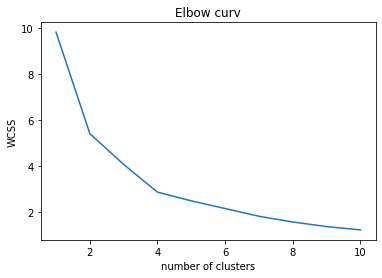

In [ ]:
# Elbow curv
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df_norm)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow curv')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()

looking at the curve we may conclude that the number of cluster shall be takes as 4

In [ ]:
# build cluster algorithum
clusters_new1 = KMeans(n_clusters=4,random_state=42)
clusters_new1.fit(df_norm)

KMeans(n_clusters=4, random_state=42)

In [ ]:
clusters_new1.labels_

array([2, 0, 0, 2, 0, 0, 3, 2, 0, 2, 3, 1, 0, 3, 1, 3, 1, 2, 1, 0, 3, 0,
       1, 2, 3, 1, 1, 0, 1, 3, 0, 0, 2, 1, 3, 3, 3, 3, 3, 2, 1, 2, 3, 3,
       1, 3, 3, 1, 1, 3], dtype=int32)

In [ ]:
# assign clusters to the dataset
data1_km["clusterID_km"]=clusters_new1.labels_
data1_km

,Murder,Assault,UrbanPop,Rape,clusterID_km
Alabama,13.2,236,58,21.2,2
Alaska,10.0,263,48,44.5,0
Arizona,8.1,294,80,31.0,0
Arkansas,8.8,190,50,19.5,2
California,9.0,276,91,40.6,0
Colorado,7.9,204,78,38.7,0
Connecticut,3.3,110,77,11.1,3
Delaware,5.9,238,72,15.8,2
Florida,15.4,335,80,31.9,0
Georgia,17.4,211,60,25.8,2


In [ ]:
# number of data point for ecah cluster
data1_km['clusterID_km'].value_counts()

3    17
1    13
0    11
2     9
Name: clusterID_km, dtype: int64

In [ ]:
df1_clustered2 = data1_km.sort_values("clusterID_km")
df1_clustered2.iloc[:,[-1]]

,clusterID_km
Illinois,0
Alaska,0
Arizona,0
California,0
Colorado,0
Michigan,0
Florida,0
Nevada,0
Maryland,0
New Mexico,0


###DBSCAN

In [ ]:
# CREAT A COPY
data1_db=data1.copy()

In [ ]:
#Normalized data fuction
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [ ]:
df_norm=norm_func(data1_db.iloc[:,1:])

In [ ]:
#creating clusters
dbscan1 = DBSCAN(eps=5, min_samples=8)
dbscan1.fit(df_norm)

DBSCAN(eps=5, min_samples=8)

In [ ]:
#Noicy samples are given the label -1
dbscan1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [ ]:
#assign clusters to the dataset
data1_db["clusterID_db"] = dbscan1.labels_
data1_db.head()

,Murder,Assault,UrbanPop,Rape,clusterID_db
Alabama,13.2,236,58,21.2,0
Alaska,10.0,263,48,44.5,0
Arizona,8.1,294,80,31.0,0
Arkansas,8.8,190,50,19.5,0
California,9.0,276,91,40.6,0


In [ ]:
#number of datapoints for each clusters
data1_db["clusterID_db"].value_counts()

0    50
Name: clusterID_db, dtype: int64

In [ ]:
df1_clustered3 = data1_db.sort_values("clusterID_db")
df1_clustered3.iloc[:,[-1]]

,clusterID_db
Alabama,0
Nevada,0
New Hampshire,0
New Jersey,0
New Mexico,0
New York,0
North Carolina,0
North Dakota,0
Ohio,0
Oklahoma,0


Here, all the data points are held under a single cluster, hence DBSCAN is not an appropriate method for clustering for this dataset.
The 2nd record is noisy

In [ ]:
#Comparing the clusters from various methods
km1 = data1_km["clusterID_km"]
db1 = data1_db["clusterID_db"]
hc1 = data1_hc['clusterID_hc']
final1 = pd.concat([km1, hc1, db1], axis=1)
final1

,clusterID_km,clusterID_hc,clusterID_db
Alabama,2,1,0
Alaska,0,0,0
Arizona,0,3,0
Arkansas,2,1,0
California,0,3,0
Colorado,0,3,0
Connecticut,3,1,0
Delaware,2,1,0
Florida,0,3,0
Georgia,2,1,0


### Visualizing Clusters

In [ ]:
plot_data = final1.reset_index()
plot_data.head()

,index,clusterID_km,clusterID_hc,clusterID_db
0,Alabama,2,1,0
1,Alaska,0,0,0
2,Arizona,0,3,0
3,Arkansas,2,1,0
4,California,0,3,0


In [ ]:
states1 = us.states.mapping('name','abbr')

In [ ]:
codes = plot_data['index'].map(lambda x: states1.get(x, x))
plot_data['StateCode'] = codes
plot_data.head()

,index,clusterID_km,clusterID_hc,clusterID_db,StateCode
0,Alabama,2,1,0,AL
1,Alaska,0,0,0,AK
2,Arizona,0,3,0,AZ
3,Arkansas,2,1,0,AR
4,California,0,3,0,CA


In [ ]:
# Plot
fig_t1 = px.choropleth(plot_data,
                    locations='StateCode', 
                    locationmode="USA-states", 
                    scope='usa',
                    color='clusterID_hc',
                    color_continuous_scale="Viridis_r", 
                    
                    )
fig_t2 = px.choropleth(plot_data,
                    locations='StateCode', 
                    locationmode="USA-states", 
                    scope='usa',
                    color='clusterID_km',
                    color_continuous_scale="Viridis_r",
                    
                    )
fig = make_subplots(rows=1, cols=2,
                    subplot_titles=['Hierarchical Clustering', 'K-means Clustering'],
                    specs=[[{'type': 'choropleth'}, {'type': 'choropleth'}]])

fig.add_trace(fig_t1['data'][0], row=1, col=1)
fig.add_trace(fig_t2['data'][0], row=1, col=2)

#fig.update_layout(coloraxis_showscale=False) # update
fig.update_geos(fitbounds="locations", visible=True)

fig.update_layout(title_text='Clusters using different Methods', #geo_scope='usa',
                  margin={'l': 0, 'r': 0, 't': 200, 'b': 0},
                  height=500)

fig.show()

DATA- Airlines

In [ ]:
# load the dataset
air = pd.read_excel("/content/EastWestAirlines.xlsx",sheet_name='data', index_col=0)
air.index.rename('ID', inplace=True)
air.rename(columns={'Award?': 'Award'}, inplace=True)
air.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1


## About the dataset

* ID --Unique ID


* Balance--Number of miles eligible for award travel


* Qual_mile--Number of miles counted as qualifying for Topflight status


* cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:


* cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:


* cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:



> * for miles :

> 1 = under 5,000

> 2 = 5,000 - 10,000

> 3 = 10,001 - 25,000

> 4 = 25,001 - 50,000

> 5 = over 50,000

* Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months



* Bonus_trans--Number of non-flight bonus transactions in the past 12 months



* Flight_miles_12mo--Number of flight miles in the past 12 months



* Flight_trans_12--Number of flight transactions in the past 12 months



* Days_since_enrolled--Number of days since enrolled in flier program



* Award--whether that person had award flight (free flight) or not (1=not null; 0=null)


In [ ]:
# basic info about dataset 
air.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 1 to 4021
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award              3999 non-null   int64
dtypes: int64(11)
memory usage: 374.9 KB


In [ ]:
air.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


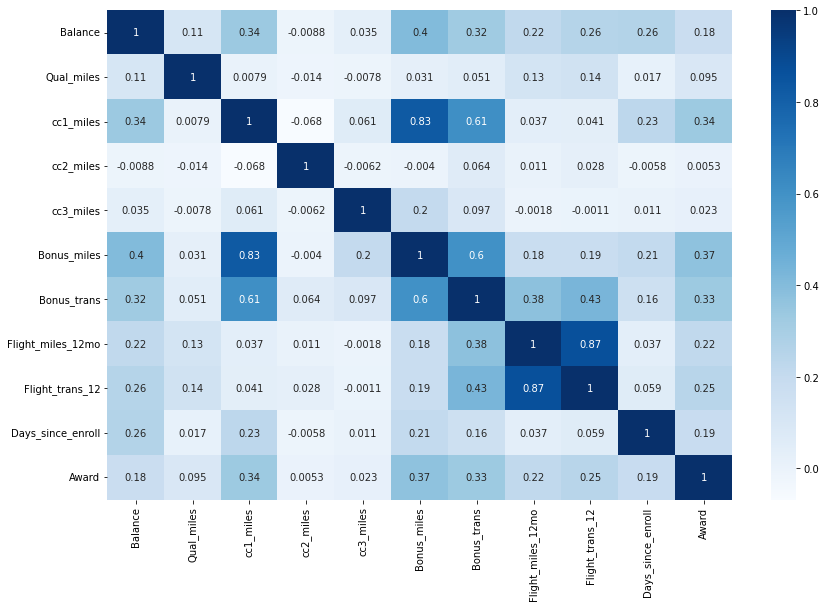

In [ ]:
plt.figure(figsize=(14,9))
sns.heatmap(air.corr(),cbar=True,annot=True,cmap='Blues')
plt.show()

### Hierachical Clustering

In [ ]:
air_hc = air.copy()

In [ ]:
df_norm = norm_func(air_hc)
df_norm.head()


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
1,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
2,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
3,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
4,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
5,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


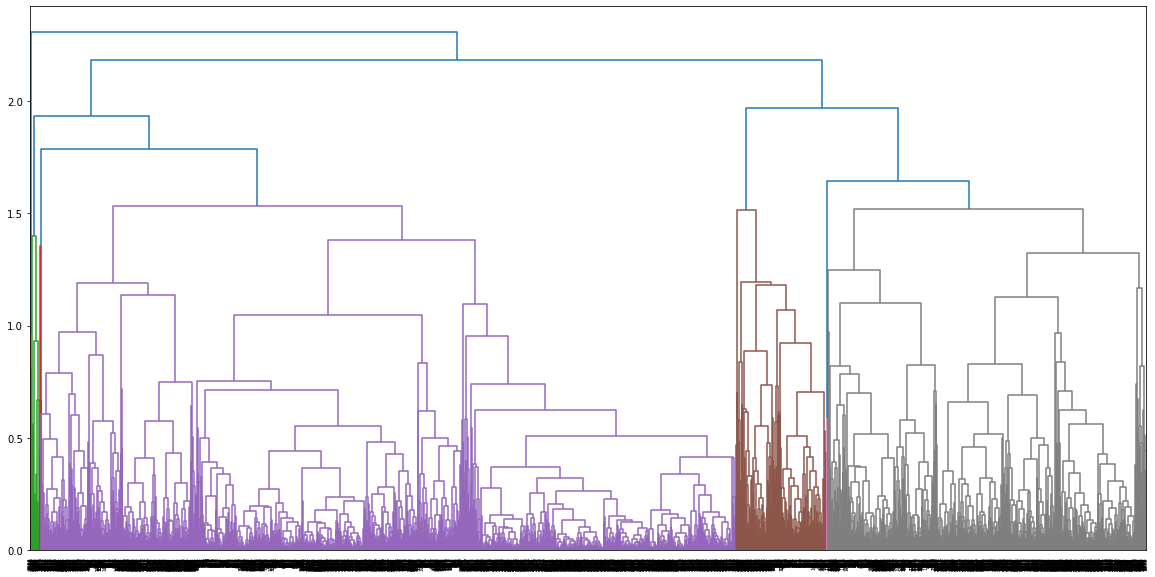

In [ ]:
#create dendrogram
plt.figure(figsize=(20,10))
dendrogram2 = sch.dendrogram(sch.linkage(df_norm, method="complete"))

seening at the dendogram we can select number of clusters as 7

In [ ]:
#create clusters
hc2 = AgglomerativeClustering(n_clusters=7, affinity = "euclidean", linkage = "complete")
hc2.fit(df_norm)

AgglomerativeClustering(linkage='complete', n_clusters=7)

In [ ]:
#saving the clusters
y_hc2 = hc2.fit_predict(df_norm)
y_hc2

array([0, 0, 0, ..., 2, 0, 0])

In [ ]:
#adding the clusters to the dataframe
air_hc['clusterID_hc'] = y_hc2
air_hc.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusterID_hc
ID,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,0
2,19244,0,1,1,1,215,2,0,0,6968,0,0
3,41354,0,1,1,1,4123,4,0,0,7034,0,0
4,14776,0,1,1,1,500,1,0,0,6952,0,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1,1


In [ ]:
#number of datapoints for each clusters
air_hc["clusterID_hc"].value_counts()

0    2491
2    1140
1     325
4      31
5       4
6       4
3       4
Name: clusterID_hc, dtype: int64

In [ ]:
df2_clustered1 = air_hc.sort_values("clusterID_hc")
df2_clustered1.iloc[:,[0,-1]]

,Balance,clusterID_hc
ID,,
1,28143,0
2503,163315,0
2504,23649,0
2506,169794,0
2507,23781,0
...,...,...
915,15835,5
1189,32214,6
1350,128664,6


### K-Means Clustering

In [ ]:
# creat a copy
air_km = air.copy()

In [ ]:
#Normalize Function
scaled_df2 = scaler.fit_transform(air_km.iloc[:,1:])

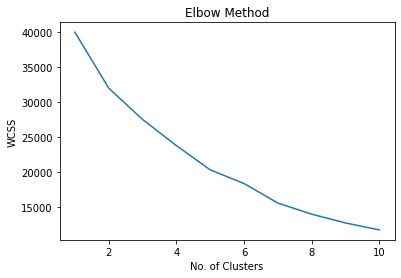

In [ ]:
wcss2 = []
for i in range(1,11):
  kmeans2 = KMeans(n_clusters=i,random_state=0)
  kmeans2.fit(scaled_df2)
  wcss2.append(kmeans2.inertia_)

plt.plot(range(1,11),wcss2)
plt.title("Elbow Method")
plt.xlabel("No. of Clusters")
plt.ylabel("WCSS")
plt.show()

Looking at the curve we may conclude that the number of cluster shall be taken as 7

In [ ]:
#Build Cluster algorithm
clusters_new2 = KMeans(n_clusters=7,random_state=42)
clusters_new2.fit(scaled_df2)

KMeans(n_clusters=7, random_state=42)

In [ ]:
clusters_new2.labels_

array([0, 0, 0, ..., 3, 0, 0], dtype=int32)

In [ ]:
#assign clusters to the dataset
air_km["clusterID_km"] = clusters_new2.labels_
air_km.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusterID_km
ID,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,0
2,19244,0,1,1,1,215,2,0,0,6968,0,0
3,41354,0,1,1,1,4123,4,0,0,7034,0,0
4,14776,0,1,1,1,500,1,0,0,6952,0,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1,6


In [ ]:
#number of datapoints for each clusters
air_km["clusterID_km"].value_counts()

0    2085
6     864
3     815
5     121
1      56
2      43
4      15
Name: clusterID_km, dtype: int64

In [ ]:
df2_clustered2 = air_km.sort_values("clusterID_km")
df2_clustered2.iloc[:,[-1]]

,clusterID_km
ID,
1,0
2470,0
2472,0
2476,0
2478,0
...,...
891,6
2677,6
894,6


### DBSACN

In [ ]:
# create a copy
air_db = air.copy()

In [ ]:
#Normalize Function
norm_df2 = scaler.fit_transform(air_db.iloc[:,1:])

In [ ]:
#creating clusters
dbscan2 = DBSCAN(eps=5, min_samples=11)
dbscan2.fit(norm_df2)

DBSCAN(eps=5, min_samples=11)

In [ ]:
#Noicy samples are given the label -1
dbscan2.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#assigning the clusters to the datset
air_db["clusterID_db"] = dbscan2.labels_
air_db.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusterID_db
ID,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,0
2,19244,0,1,1,1,215,2,0,0,6968,0,0
3,41354,0,1,1,1,4123,4,0,0,7034,0,0
4,14776,0,1,1,1,500,1,0,0,6952,0,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1,0


In [ ]:
#number of datapoints for each clusters
air_db["clusterID_db"].value_counts()

 0    3934
 2      28
-1      22
 1      15
Name: clusterID_db, dtype: int64

In [ ]:
df2_clustered3 = air_db.sort_values("clusterID_db")
df2_clustered3.iloc[:,[-1]]

,clusterID_db
ID,
1257,-1
1934,-1
1313,-1
348,-1
1963,-1
...,...
568,2
230,2
1542,2


The DBSCAN has created 3 clusters, and the cluster with-1 label represents the noisy datapoint

In [ ]:
#comparing the clusters from various methods
km2 = air_km["clusterID_km"]
db2 = air_db["clusterID_db"]
hc2 = air_hc['clusterID_hc']
final2 = pd.concat([km2, hc2, db2], axis=1)
final2

,clusterID_km,clusterID_hc,clusterID_db
ID,,,
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
5,6,1,0
...,...,...,...
4017,3,2,0
4018,3,2,0
4019,3,2,0
